패키지 설치

In [122]:
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb
from statsmodels.graphics.mosaicplot import mosaic

In [123]:
plt.rcParams['font.family']="Malgun Gothic"
plt.rcParams['font.size']=10
plt.rcParams['figure.figsize']=(7,4)
plt.rcParams['axes.unicode_minus']=False

데이터 준비

In [124]:
df = read_excel("https://data.hossam.kr/D01/mpg.xlsx")
df

,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [125]:
print(df.dtypes)

id                int64
manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object


In [126]:
df = read_excel("https://data.hossam.kr/D01/mpg.xlsx", index_col="id")
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
id,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize


# 문제 1

자동차 제조사별로 출시한 자동차 수를 하나의 그래프로 시각화

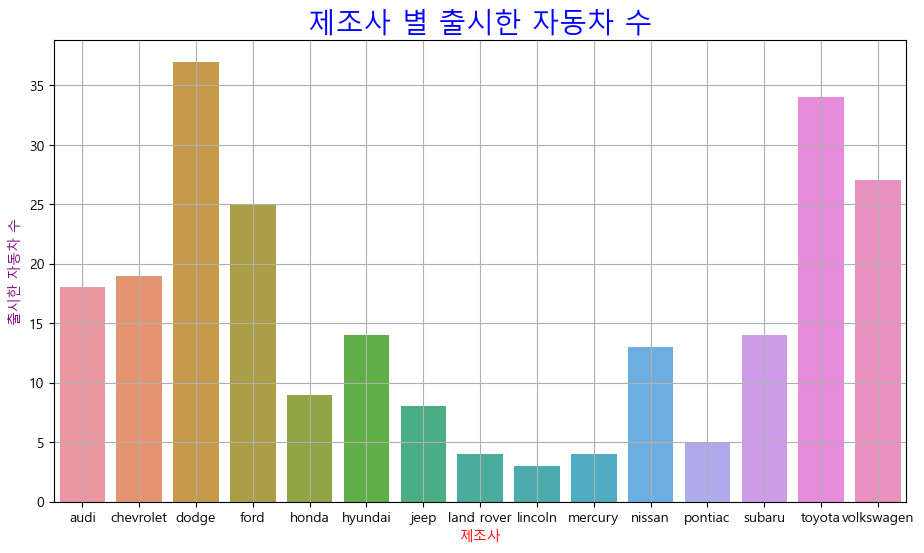

In [127]:
plt.rcParams['figure.figsize']=(11,6)
sb.countplot(data=df, x="manufacturer")
plt.title("제조사 별 출시한 자동차 수", fontsize=20, color="blue")
plt.xlabel("제조사", color="red")
plt.ylabel("출시한 자동차 수", color="purple")
plt.grid()
plt.show()
plt.close()

# 문제2

자동차 제조사에 따른 자동차 수를 제조년도를 범주로 하여 하나의 그래프로 시각화

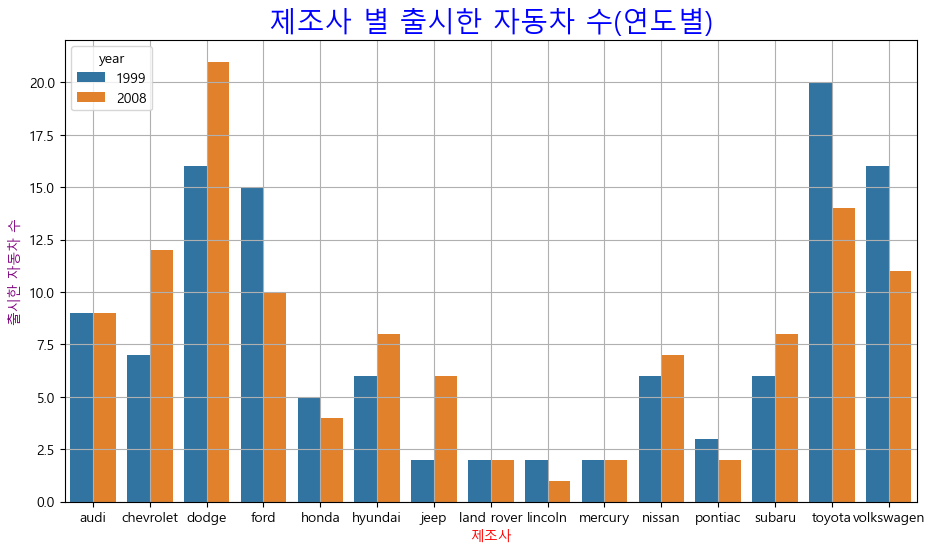

In [128]:
sb.countplot(data=df, x="manufacturer",
             hue="year")
plt.title("제조사 별 출시한 자동차 수(연도별)", fontsize=20, color="blue")
plt.xlabel("제조사", color="red")
plt.ylabel("출시한 자동차 수", color="purple")
plt.grid()
plt.show()
plt.close()

In [129]:
df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

# 문제3

구동방식에 따른 자동차 수를 하나의 그래프로 시각화

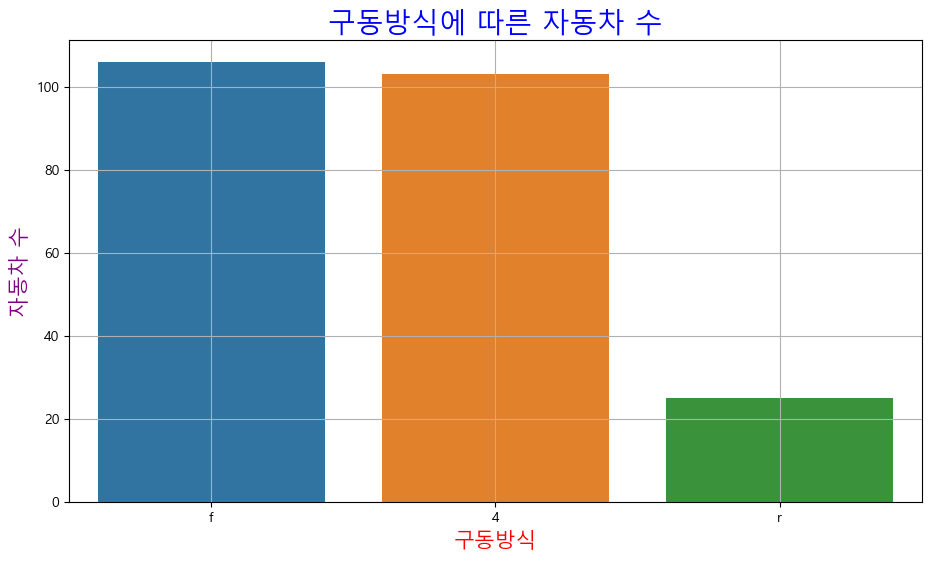

In [130]:
sb.countplot(data=df, x="drv")
plt.title("구동방식에 따른 자동차 수", fontsize=20, color="blue")
plt.xlabel("구동방식", color="red", fontsize = 15)
plt.ylabel("자동차 수", color="purple", fontsize = 15)
plt.grid()
plt.show()
plt.close()

# 문제4

자동차 구동 방식에 따른 도심 연비 평균을 하나의 그래프로 시각화

In [131]:
print(df.columns)

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')


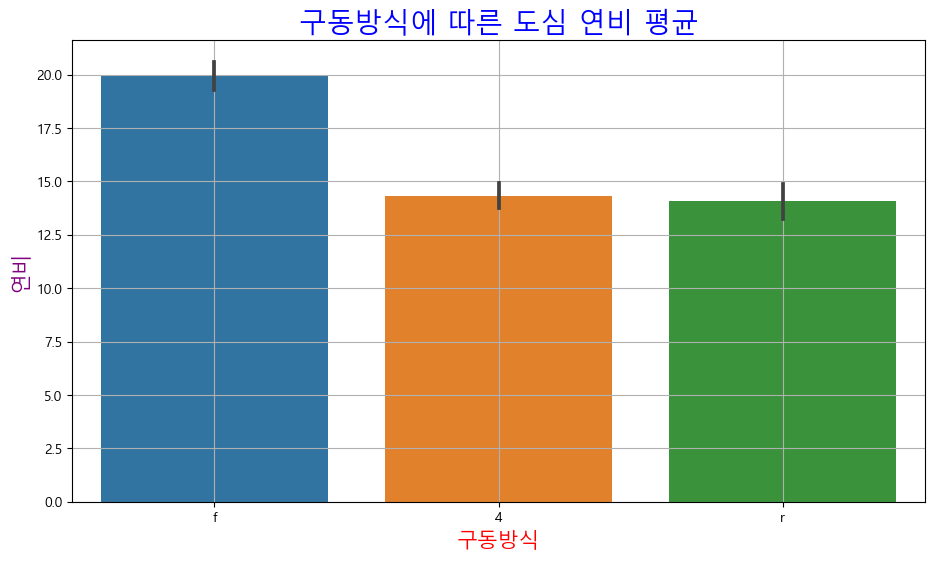

In [132]:
# barplot은 기본이 평균. 굳이 잡아 준다면 estimator='mean'
sb.barplot(data=df,
           x="drv",
           y="cty")
plt.title("구동방식에 따른 도심 연비 평균", fontsize=20, color="blue")
plt.xlabel("구동방식", color="red", fontsize = 15)
plt.ylabel("연비", color="purple", fontsize = 15)
plt.grid()
plt.show()
plt.close()

# 문제5

자동차 제조사에 따른 도심 연비 평균과 고속도로 연비 평균을 서브플롯 형태로 시각화

In [133]:
df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

<Axes: xlabel='manufacturer'>

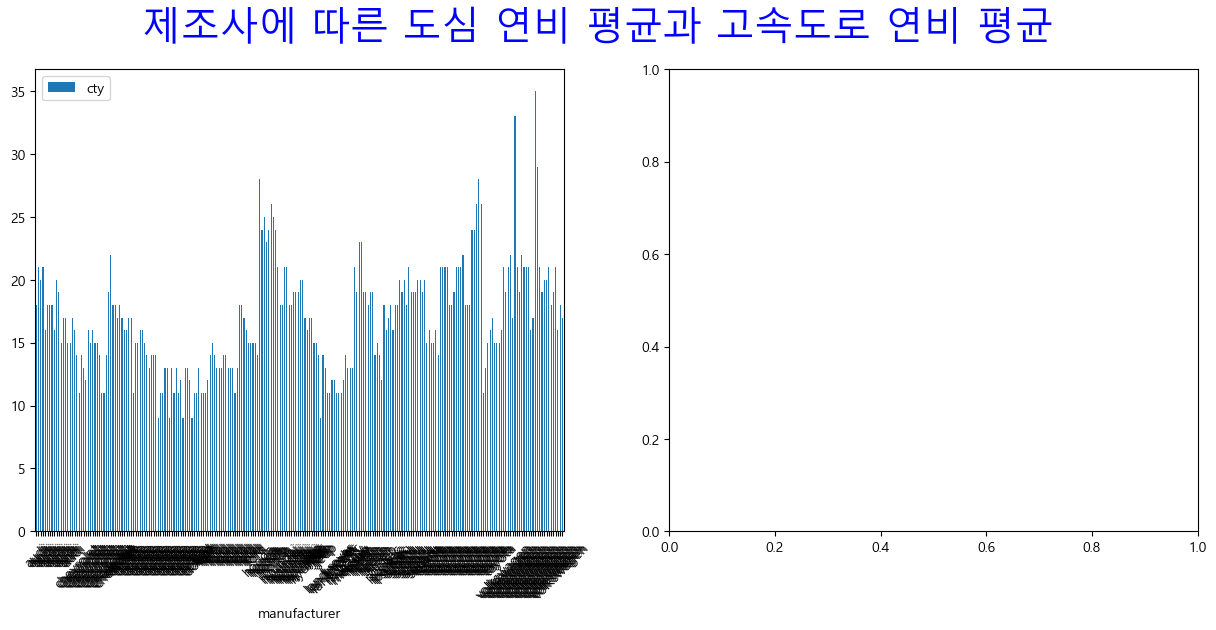

In [134]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 전체 제목
fig.suptitle("제조사에 따른 도심 연비 평균과 고속도로 연비 평균", fontsize = 28, color = 'blue')

df.plot.bar(ax=ax1, x="manufacturer", y="cty", rot=45)

# 문제6

배기량과 도심연비, 배기량과 고속도로 연비의 상관관계를 확인하고자 한다.

서브플롯에 각 그래프를 시각화 하고 추세선을 포함

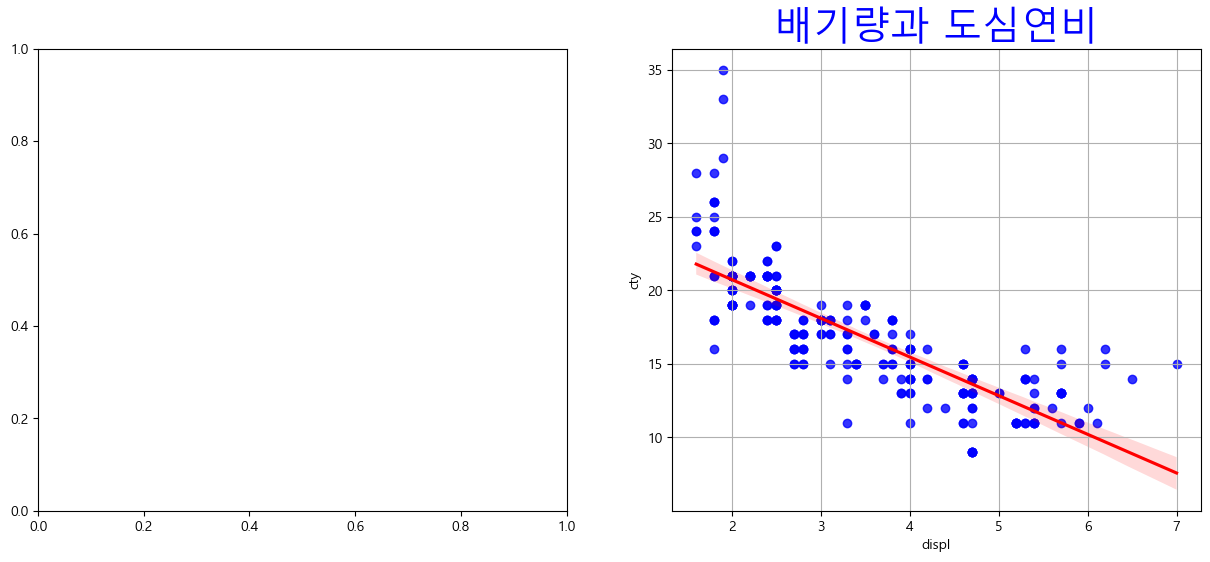

In [135]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 6))

sb.regplot(data=df, 
               x='displ', y='cty',
               line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})
# sb.regplot(data=df, 
#                x='displ', y='hwy',
#                line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})
plt.title("배기량과 도심연비", fontsize = 28, color = 'blue')
plt.grid()
plt.show()
plt.close()